In [52]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# 1. Data Preprocessing
df = pd.read_csv('data.csv', delimiter=';')

In [29]:
# Print
df.sample(4)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1877,1,1,5,9500,1,1,143.0,1,37,19,...,0,8,0,0,0.000000,0,7.6,2.6,0.32,Dropout
111,1,17,2,9147,1,1,123.0,1,1,38,...,0,5,11,3,11.000000,0,8.9,1.4,3.51,Enrolled
819,1,1,1,8014,0,1,123.0,1,34,37,...,0,6,6,6,12.833333,0,7.6,2.6,0.32,Graduate
3571,1,17,1,9119,1,1,148.0,1,1,38,...,0,5,8,5,16.000000,0,8.9,1.4,3.51,Graduate


In [30]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

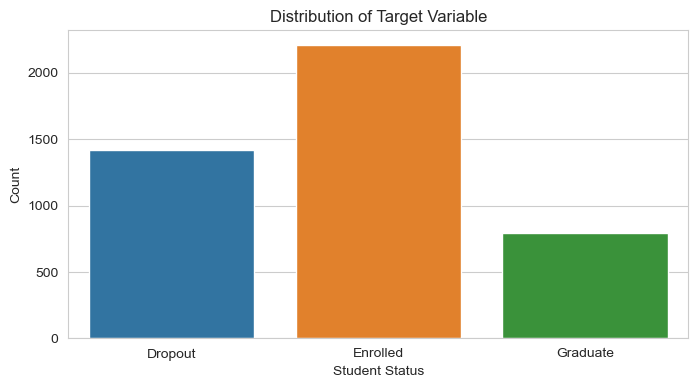

In [32]:
# Set style for seaborn
sns.set_style("whitegrid")

# 1. Countplot of the Target variable
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Target')
plt.title('Distribution of Target Variable')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Student Status')
plt.ylabel('Count')
plt.show()

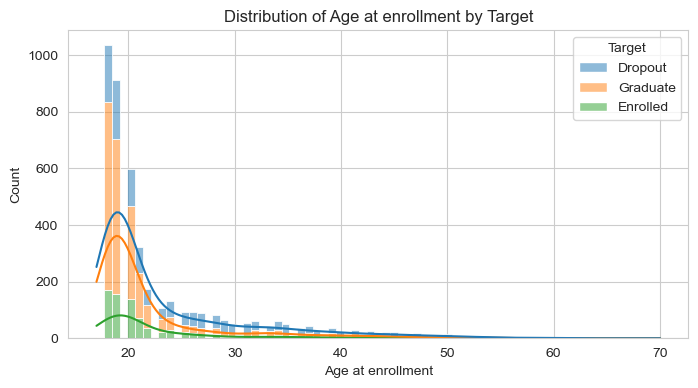

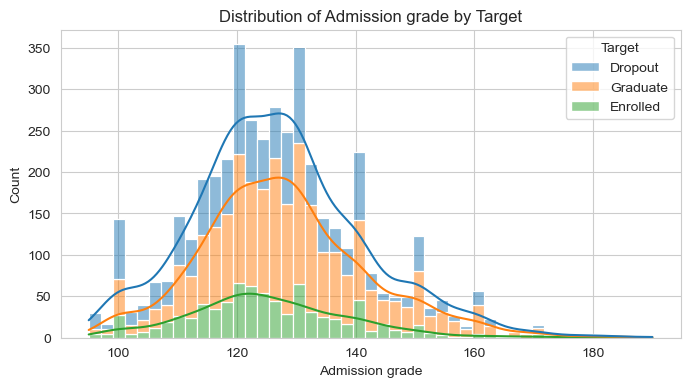

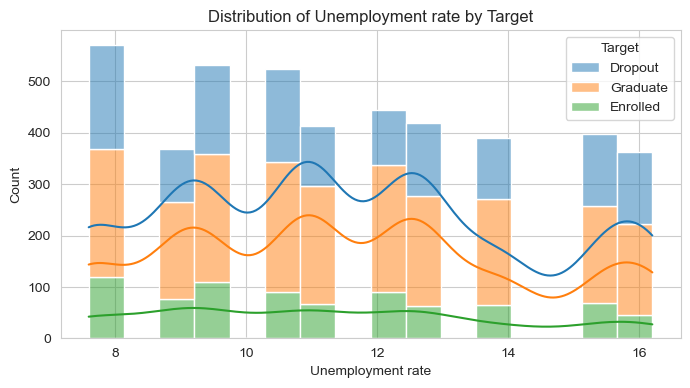

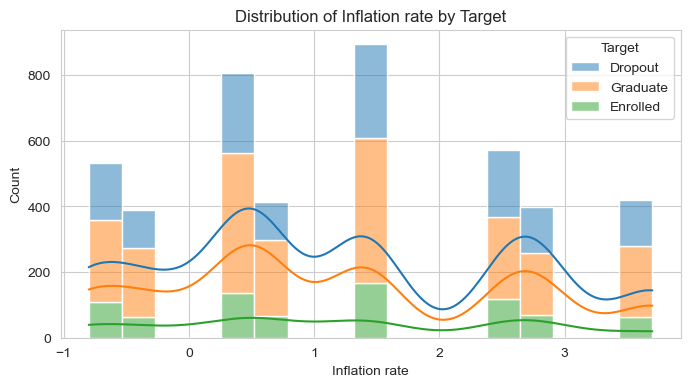

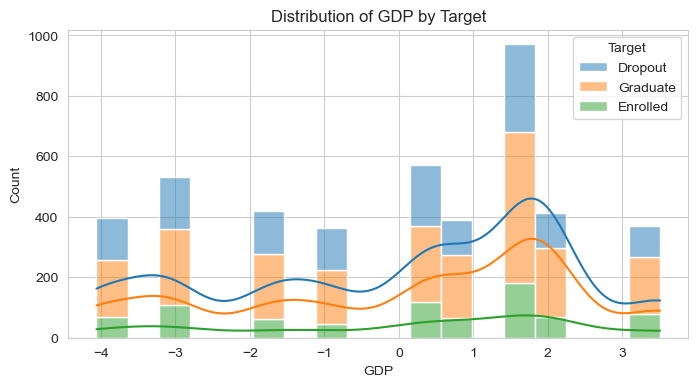

In [33]:
# 2. Histograms of Numerical variables
numerical_columns = ['Age at enrollment', 'Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Target', multiple='stack', kde=True)
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

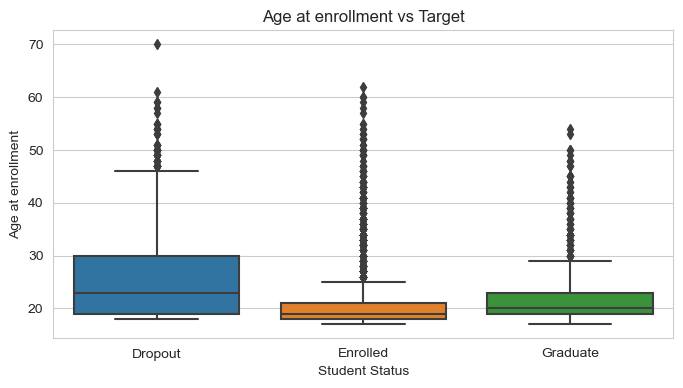

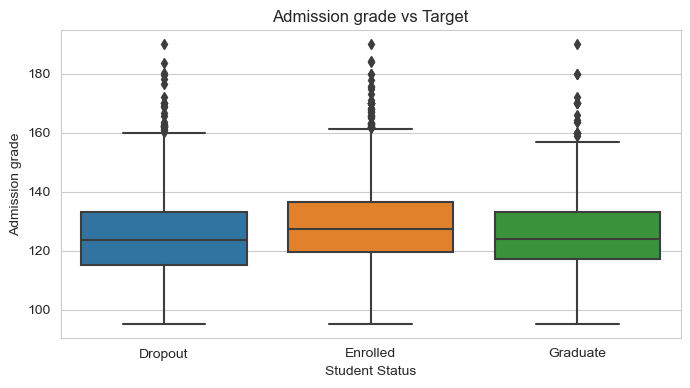

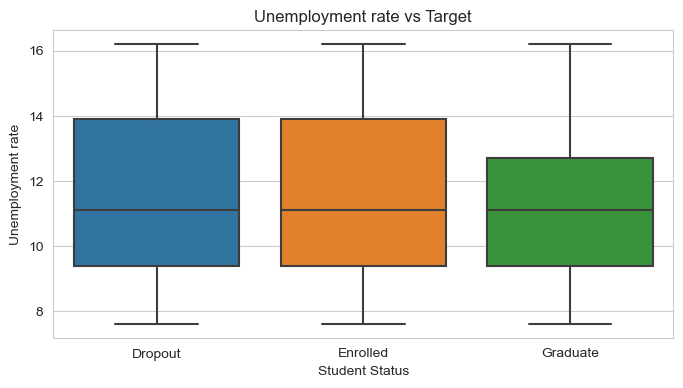

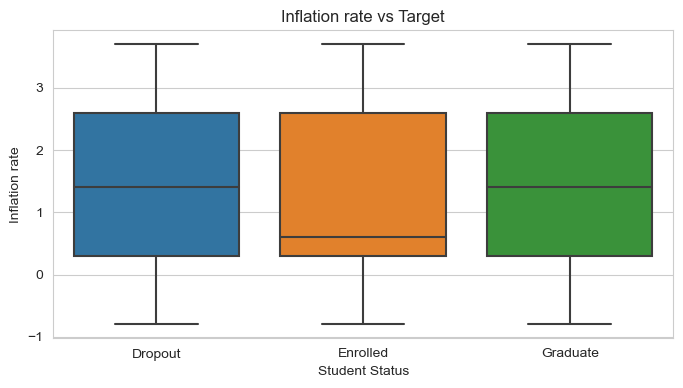

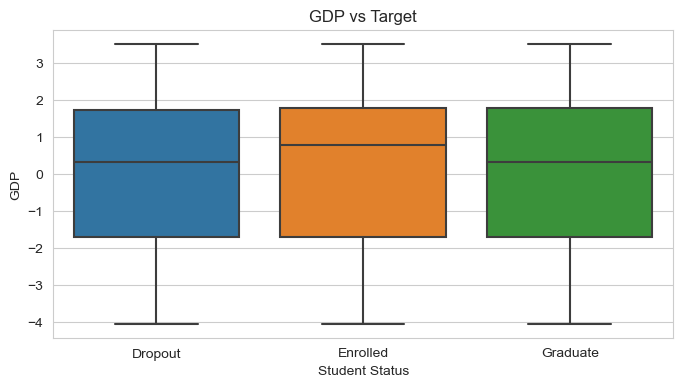

In [34]:
# 3. Boxplots for Numerical variables vs Target
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Target', y=col)
    plt.title(f'{col} vs Target')
    plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
    plt.xlabel('Student Status')
    plt.ylabel(col)
    plt.show()

C:\Users\raymo\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning:

Glyph 9 (	) missing from current font.

C:\Users\raymo\anaconda\lib\site-packages\seaborn\utils.py:660: UserWarning:

Glyph 9 (	) missing from current font.

C:\Users\raymo\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



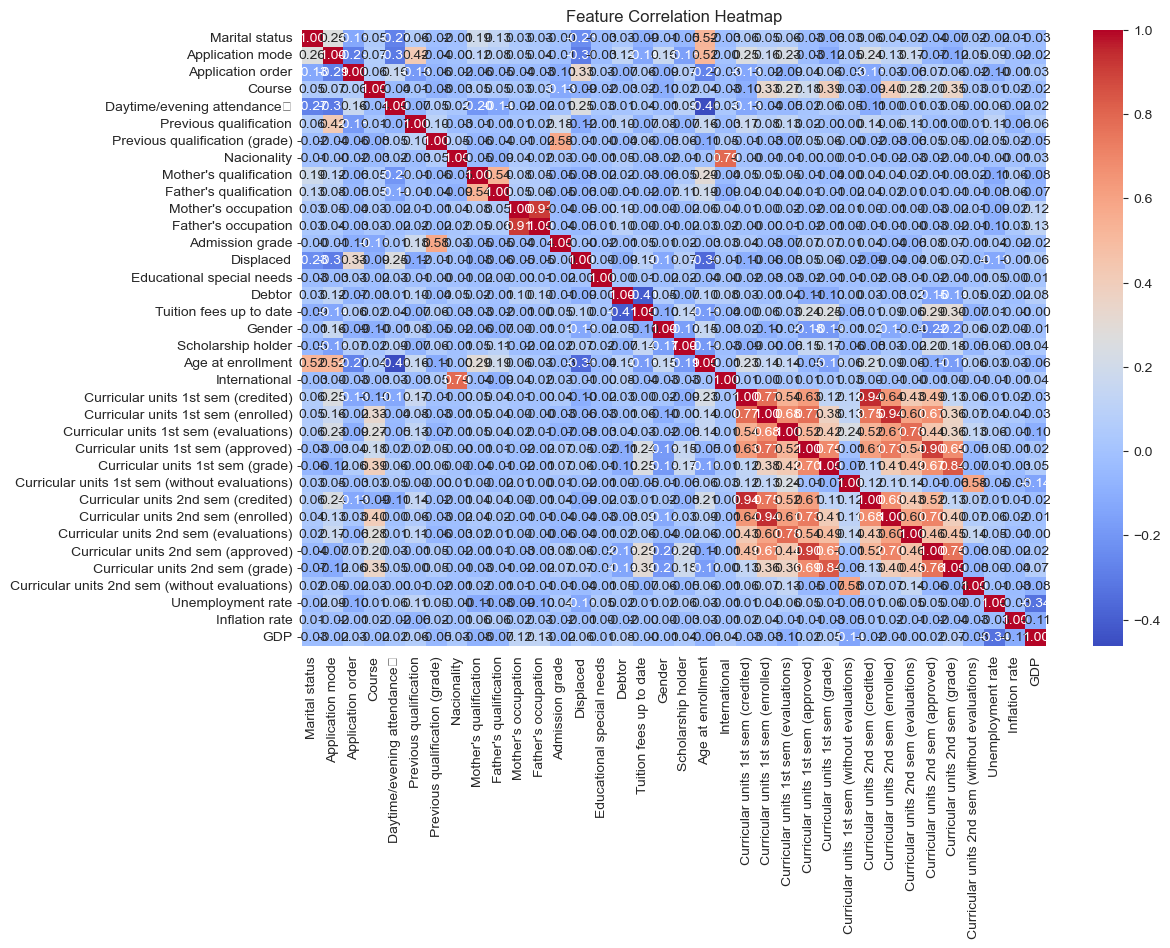

In [35]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

A correlation coefficient close to 1 indicates a strong positive correlation. This means as one variable increases, the other variable tends to increase as well.
A correlation coefficient close to -1 indicates a strong negative correlation. This means as one variable increases, the other variable tends to decrease.
A correlation coefficient close to 0 indicates no linear relationship between the variables.


Values close to 1 are represented by warmer colors (such as red).
Values close to -1 are represented by cooler colors (such as blue).
Values close to 0 are represented by neutral colors (such as white)

In [36]:
#turn Target to Numerica Value
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [37]:
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [22]:
df.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.221747
Application order                                 0.089791
Course                                            0.034219
Daytime/evening attendance\t                      0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nacionality                                      -0.014801
Mother's qualification                           -0.043178
Father's qualification                           -0.001393
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

A correlation coefficient close to 1 indicates a strong positive correlation. This means as one variable increases, the other variable tends to increase as well. A correlation coefficient close to -1 indicates a strong negative correlation. This means as one variable increases, the other variable tends to decrease. A correlation coefficient close to 0 indicates no linear relationship between the variables.

'Application mode' (-0.212025) 'Debtor' (-0.240999) 'Tuition fees up to date' (0.409827) 'Gender' (-0.229270) 'Scholarship holder' (0.297595) 'Age at enrollment' (-0.243438) 'Curricular units 1st sem (approved)' (0.529123) 'Curricular units 1st sem (grade)' (0.485207) 'Curricular units 2nd sem (approved)' (0.624157) 'Curricular units 2nd sem (grade)' (0.566827)

Random Forest

In [41]:
# Split data into training and testing sets
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [43]:
# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

In [45]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best estimator
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


In [46]:
# Evaluate the tuned model
predictions = best_grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Best Parameters: {best_params}")
print(f"Accuracy of tuned model: {accuracy}")

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy of tuned model: 0.7604519774011299


SMOTE to balance the classes

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [48]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [50]:
# Using the best parameters from GridSearchCV
rf = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                            min_samples_leaf=1, min_samples_split=10, n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=10, n_estimators=50)

In [51]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8235294117647058


Cross validating

In [53]:
# Initialize the RandomForestClassifier with specific hyperparameters
rf = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                            min_samples_leaf=1, min_samples_split=10, n_estimators=50)

In [54]:
# Specify multiple scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [55]:
# Specify multiple scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation, cv is the number of folds
scores = cross_validate(rf, X_smote, y_smote, scoring=scoring, cv=5, return_train_score=False)

In [56]:
# Print the scores
for metric, values in scores.items():
    print(f"{metric}: {np.mean(values):.4f} (+/- {np.std(values):.4f})")


fit_time: 0.4831 (+/- 0.0098)
score_time: 0.0162 (+/- 0.0004)
test_accuracy: 0.8275 (+/- 0.0514)
test_precision_macro: 0.8340 (+/- 0.0500)
test_recall_macro: 0.8275 (+/- 0.0514)
test_f1_macro: 0.8265 (+/- 0.0529)


fit_time: This value, approximately 0.4831 seconds, indicates the average time the model takes to train across different folds in the cross-validation process. The standard deviation of this training time is 0.0098, indicating that the training time is stable and does not fluctuate significantly.

score_time: Score time represents the average time the model takes to make predictions and score the test sets. It is significantly less than the fit_time, around 0.0162 seconds, showing that predictions are generated quickly.

test_accuracy: The average accuracy score is 0.8275. This metric measures the ratio of the number of correct predictions to the total number of predictions. The standard deviation of 0.0514 shows that there is some variation across the folds, but it's not exceptionally high.

test_precision_macro: Precision is an indicator of the exactness or quality of the model, and the average macro-precision score is 0.8340. This means that when the model makes a positive prediction, it is correct about 83.4% of the time.

test_recall_macro: Recall, on the other hand, measures the completeness or quantity. The average macro-recall of 0.8275 means that the model captures about 82.75% of actual positive cases.

test_f1_macro: The F1 score is a harmonic mean of precision and recall and provides a single score that balances both the concerns of precision and recall in one number. An average F1 score of 0.8265 is fairly good, indicating that the model maintains a balance between precision and recall.

Data Visulization

C:\Users\raymo\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



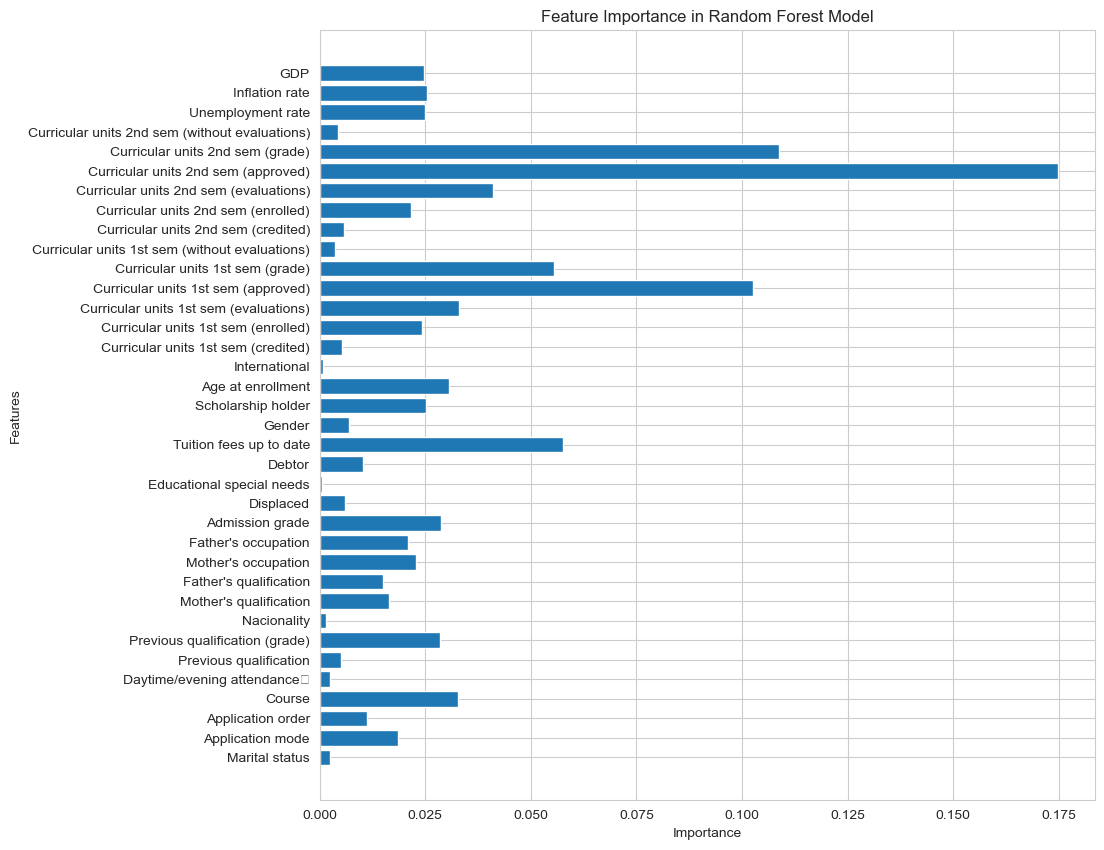

In [59]:
# Assuming X_train and y_train are your training data and labels
rf.fit(X_train, y_train)

# After fitting the model
feature_importances = rf.feature_importances_
feature_names = df.columns[:-1]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10)) # Change the height here
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()

Feature Importance Plot
The feature importance plot illustrates the importance of each feature in the random forest model. The heights of the bars represent the importance scores, indicating how much each feature contributes to making accurate predictions. The higher the bar, the more influential the feature. By analyzing this plot, we can identify the top features that have the most impact on the model's predictions. This information can guide us in understanding which factors play a significant role in determining the outcomes or target variable.

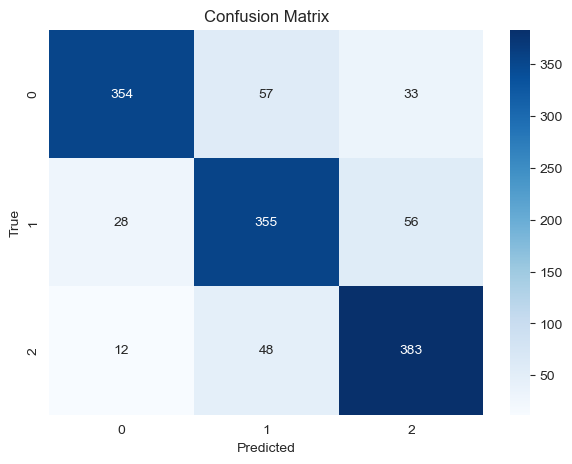

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test are the true labels and y_pred are the predictions
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix
The confusion matrix provides a visual representation of the performance of our model. It shows how well the model classified the different classes. The rows represent the true classes, while the columns represent the predicted classes. The numbers within the matrix indicate the count or frequency of predictions falling into different categories (true positive, true negative, false positive, false negative). By analyzing the confusion matrix, we can gain insights into the accuracy of the model's predictions and understand any potential misclassifications or errors it may have made.

To interpret the confusion matrix, you can look at the numbers within the cells. Each cell represents the count or frequency of predictions falling into a specific category. The numbers along the diagonal (from the top left to the bottom right) indicate the correct predictions (TP and TN), while the off-diagonal numbers represent the incorrect predictions (FP and FN).

True Positives (TP): These are the cases where the model correctly predicted the positive class (e.g., correctly identifying students who graduated).

True Negatives (TN): These are the cases where the model correctly predicted the negative class (e.g., correctly identifying students who dropped out).

False Positives (FP): These are the cases where the model incorrectly predicted the positive class when the actual class was negative (e.g., predicting a student will graduate when they actually dropped out).

False Negatives (FN): These are the cases where the model incorrectly predicted the negative class when the actual class was positive (e.g., predicting a student will drop out when they actually graduated).


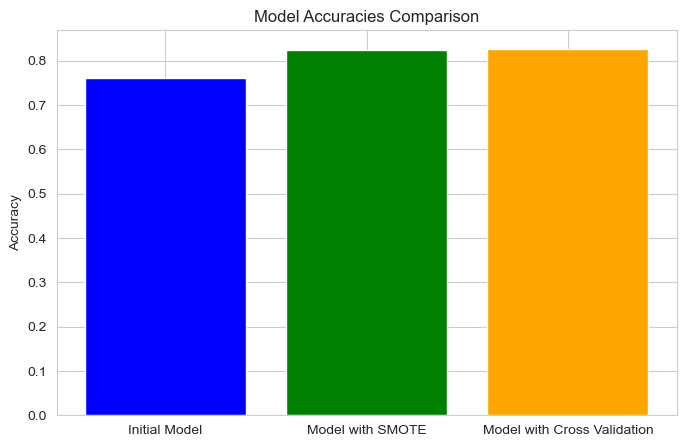

In [62]:
initial_accuracy = 0.7604
smote_accuracy = 0.8235 
cross_val_accuracy = 0.8275 

scores = [initial_accuracy, smote_accuracy, cross_val_accuracy]
labels = ['Initial Model', 'Model with SMOTE', 'Model with Cross Validation']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.show()


Model Scores Comparison
The model scores comparison bar plot presents a comparison of different models or model configurations. Each bar represents the accuracy score of a particular model. By examining the heights of the bars, we can assess the performance of each model. The model with the highest accuracy is considered the most effective in making accurate predictions. This visualization allows us to compare the performance of different models or techniques, such as comparing the initial model's accuracy with the accuracy after applying SMOTE or cross-validation. It helps us identify which approach yields the best results in terms of accuracy and choose the most suitable model for our problem.